In [83]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *


from keras.preprocessing import image
from keras.layers import Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import os


import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [85]:
!7z x '/content/drive/MyDrive/Dataset.zip'


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 84716977 bytes (81 MiB)

Extracting archive: /content/drive/MyDrive/Dataset.zip
 11% 4096 Open              --
Path = /content/drive/MyDrive/Dataset.zip
Type = zip
Physical Size = 84716977

  0%    
Would you like to replace the existing file:
  Path:     ./Dataset/0/0_10000_1577671998.6491628.png
  Size:     2441 bytes (3 KiB)
  Modified: 2019-12-29 23:13:20
with the file from archive:
  Path:     Dataset/0/0_10000_1577671998.6491628.png
  Size:     2441 bytes (3 KiB)
  Modified: 2019-12-29 23:13:20
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? q

Archives with E

In [86]:
path="/content/Dataset"
labelFile='/content/labels.csv'
batch_size=32
imageD=0.2
testR=0.2
validR=0.2
count=0
images=[]
classNo=[]
myList=os.listdir(path)
print("total classes detected 43")
len(myList)

for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1

total classes detected 43
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [87]:
len(images),len(images[0]),len(images[1])

(34799, 32, 32)

In [88]:
from IPython.display import Image
Image(images[77])

In [89]:
k=images

In [90]:
images=np.array(images)
classNo=np.array(classNo)

In [91]:
images.shape

(34799, 32, 32, 3)

In [92]:
images

array([[[[180, 150, 142],
         [174, 143, 127],
         [163, 122,  92],
         ...,
         [175, 124,  92],
         [173, 121,  90],
         [170, 118,  85]],

        [[175, 143, 144],
         [163, 131, 124],
         [158, 117,  92],
         ...,
         [171, 125, 106],
         [171, 126, 106],
         [169, 123, 102]],

        [[145, 128, 135],
         [153, 136, 139],
         [159, 140, 121],
         ...,
         [169, 147, 151],
         [167, 146, 148],
         [169, 146, 148]],

        ...,

        [[ 90,  93,  91],
         [ 91,  92,  89],
         [ 97,  94,  90],
         ...,
         [ 82,  86,  83],
         [ 82,  85,  84],
         [ 82,  84,  84]],

        [[ 91,  93,  89],
         [ 94,  94,  90],
         [103,  97,  91],
         ...,
         [ 82,  84,  82],
         [ 82,  83,  83],
         [ 82,  84,  84]],

        [[ 98,  98,  92],
         [101,  99,  94],
         [108, 101,  96],
         ...,
         [ 81,  82,  82],
        

In [93]:
from sklearn.model_selection import train_test_split

# Assuming 'images' is your data and 'classNo' is your labels
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(images, classNo, test_size=0.2)
Z_TEST=X_TEST
X_TRAIN, X_VALIDATION, Y_TRAIN, Y_VALIDATION = train_test_split(X_TRAIN, Y_TRAIN, test_size=0.2)


In [94]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(X_VALIDATION.shape)

(22271, 32, 32, 3)
(6960, 32, 32, 3)
(5568, 32, 32, 3)


In [95]:
X_TRAIN[0]

array([[[ 64,  61,  49],
        [ 57,  57,  47],
        [ 56,  56,  48],
        ...,
        [ 68,  58,  51],
        [ 77,  64,  57],
        [ 85,  73,  62]],

       [[ 81,  68,  56],
        [ 74,  64,  53],
        [ 70,  61,  52],
        ...,
        [ 70,  63,  54],
        [ 78,  69,  59],
        [ 91,  80,  66]],

       [[107,  84,  69],
        [113,  93,  78],
        [103,  84,  70],
        ...,
        [ 67,  64,  58],
        [ 79,  73,  60],
        [ 89,  80,  65]],

       ...,

       [[ 92,  87,  78],
        [ 83,  81,  75],
        [ 77,  77,  71],
        ...,
        [123,  94,  74],
        [126, 103,  81],
        [113, 102,  84]],

       [[ 99,  93,  82],
        [ 81,  81,  74],
        [ 77,  80,  73],
        ...,
        [116,  91,  72],
        [117,  97,  75],
        [116, 107,  90]],

       [[ 89,  84,  78],
        [ 79,  82,  77],
        [ 74,  81,  77],
        ...,
        [107,  86,  71],
        [108,  91,  72],
        [ 99,  92,  76]]

In [96]:
DATA=pd.read_csv(labelFile)
DATA.shape

(43, 2)

In [97]:
def grayscale(img):
  img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
def equalize(img):
  img=cv2.equalizeHist(img)
  return img
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img
# normalizing it


In [98]:
X_TRAIN.shape[0],X_TRAIN.shape[1]

(22271, 32)

In [99]:

X_TRAIN=np.array(list(map(preprocessing,X_TRAIN)))
X_VALIDATION=np.array(list(map(preprocessing,X_VALIDATION)))
X_TEST=np.array(list(map(preprocessing,X_TEST)))

In [100]:
X_TRAIN = X_TRAIN.reshape(X_TRAIN.shape[0], X_TRAIN.shape[1], X_TRAIN.shape[2], 1)
X_VALIDATION = X_VALIDATION.reshape(X_VALIDATION.shape[0], X_VALIDATION.shape[1], X_VALIDATION.shape[2], 1)
X_TEST = X_TEST.reshape(X_TEST.shape[0], X_TEST.shape[1], X_TEST.shape[2], 1)


In [101]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(X_VALIDATION.shape)

(22271, 32, 32, 1)
(6960, 32, 32, 1)
(5568, 32, 32, 1)


In [102]:
DATAGEN=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
# data augmentation
DATAGEN.fit(X_TRAIN)

In [103]:
Y_TRAIN=to_categorical(Y_TRAIN,43)
Y_VALIDATION=to_categorical(Y_VALIDATION,43)


Y_TEST=to_categorical(Y_TEST,43)

In [104]:
def models():
  model=Sequential()
  model.add((Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu')))
  # kept 1 cause grey scale
  model.add((Conv2D(60, (5,5), activation='relu')))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add((Conv2D(30, (3,3),activation='relu')))
  model.add((Conv2D(30, (3,3), activation='relu')))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation='softmax'))
  # compiling
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [105]:
model=models()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 60)        1560      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                 

In [106]:
model.fit_generator(DATAGEN.flow(X_TRAIN,Y_TRAIN,batch_size=32),steps_per_epoch=43,epochs=15,validation_data=(X_VALIDATION,Y_VALIDATION
),shuffle=1)

Epoch 1/15


<ipython-input-106-d4b653f8f7ac>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(DATAGEN.flow(X_TRAIN,Y_TRAIN,batch_size=32),steps_per_epoch=43,epochs=15,validation_data=(X_VALIDATION,Y_VALIDATION


43/43 [==============================] - 3s 34ms/step - loss: 3.6251 - accuracy: 0.0523 - val_loss: 3.4888 - val_accuracy: 0.0521
Epoch 2/15
43/43 [==============================] - 1s 30ms/step - loss: 3.5017 - accuracy: 0.0676 - val_loss: 3.4422 - val_accuracy: 0.0620
Epoch 3/15
43/43 [==============================] - 1s 30ms/step - loss: 3.4891 - accuracy: 0.0640 - val_loss: 3.2357 - val_accuracy: 0.2369
Epoch 4/15
43/43 [==============================] - 1s 24ms/step - loss: 3.2942 - accuracy: 0.1446 - val_loss: 2.6792 - val_accuracy: 0.2579
Epoch 5/15
43/43 [==============================] - 1s 23ms/step - loss: 2.9251 - accuracy: 0.2158 - val_loss: 2.1435 - val_accuracy: 0.4364
Epoch 6/15
43/43 [==============================] - 1s 26ms/step - loss: 2.6338 - accuracy: 0.2805 - val_loss: 1.8124 - val_accuracy: 0.5061
Epoch 7/15
43/43 [==============================] - 2s 41ms/step - loss: 2.4645 - accuracy: 0.3278 - val_loss: 1.5722 - val_accuracy: 0.5524
Epoch 8/15
43/43 [======

In [107]:
model.evaluate(X_TEST,Y_TEST)

218/218 [==============================] - 1s 4ms/step - loss: 0.8670 - accuracy: 0.7583


[0.8669893145561218, 0.7583333253860474]

In [117]:
img=image.load_img('/content/test32.jpg',target_size=(224,224))

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)

img = img.reshape(1, 32, 32, 1)
#
img.shape


(1, 32, 32, 1)

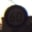

In [118]:
from IPython.display import Image
Image('/content/test32.jpg')

In [119]:
predictions=model.predict(img)
predictions

1/1 [==============================] - 0s 17ms/step


array([[4.11351249e-02, 9.02703851e-02, 7.24261627e-02, 4.37540740e-01,
        1.66520551e-02, 1.46245807e-01, 8.18999391e-03, 4.77189198e-02,
        5.25576659e-02, 4.04033810e-02, 5.64299291e-03, 6.73871327e-05,
        1.15913914e-04, 3.22840060e-04, 1.43557054e-03, 9.73001681e-03,
        3.56978225e-03, 2.26209857e-04, 4.51715925e-04, 2.80751352e-04,
        1.43096293e-03, 3.55480151e-04, 2.43323200e-04, 1.41949544e-03,
        1.77687631e-04, 3.35596793e-04, 5.23649680e-04, 2.23188224e-04,
        1.21474662e-03, 3.16426711e-04, 2.26406904e-04, 1.62759994e-03,
        3.15283868e-03, 4.32947883e-03, 1.58008508e-04, 1.21473847e-03,
        7.90313876e-04, 5.13208273e-04, 6.89365086e-04, 1.82011141e-03,
        1.02101429e-03, 1.17993169e-03, 2.05303379e-03]], dtype=float32)

In [120]:
np.argmax(predictions, axis=1)

array([3])

3 is for 60km/hr
